In [1]:
from chapter3.get_price_dataframe import *

In [2]:
f = get_price_dataframe('chapter2/stock.db', 9684)

In [3]:
f.head(3)

,open,high,low,close,volume
date,,,,,
1999-08-18,3644.448889,4133.342222,3600.000000,4133.342222,1258647.75
1999-08-19,4000.000000,4133.342222,3915.560000,4000.000000,1349772.75
1999-08-20,3955.560000,4000.000000,3822.231111,3822.231111,416250.00


In [4]:
f.tail(3)

,open,high,low,close,volume
date,,,,,
2021-06-09,5760.0,5780.0,5730.0,5780.0,213000.0
2021-06-10,5800.0,5900.0,5790.0,5870.0,351900.0
2021-06-11,5930.0,6010.0,5910.0,5940.0,591800.0


In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

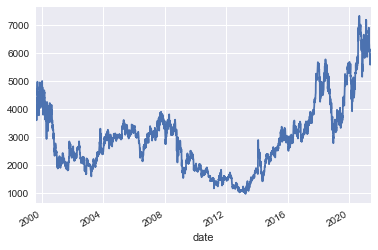

In [6]:
f = get_price_dataframe('chapter2/stock.db', 9684)
f['close'].plot()
plt.show()

In [7]:
from pandas_highcharts.display import display_charts

In [8]:
close_dataframe = f[['close',]]
close_dataframe

,close
date,
1999-08-18,4133.342222
1999-08-19,4000.000000
1999-08-20,3822.231111
1999-08-23,3600.000000
1999-08-24,3782.231111
1999-08-25,3906.671111
1999-08-26,3915.560000
1999-08-27,3915.560000
1999-08-30,4004.448889


In [9]:
# なぜか表示されない...
display_charts(close_dataframe, chart_type='stock')

In [10]:
# 以下で表示できた(^^)
# 参考ページ
# https://qiita.com/hatt_takumi/items/b2f333cf22375367c186
# 別途、display_charts_browser を定義した

import pandas as pd
import webbrowser
import os
from my_display_charts import *

html_data = my_display_charts(close_dataframe, chart_type="stock", title="My Result", figsize=(1200, 800), grid=True)
path = 'index.html'

with open(path, mode='w') as f:
    f.write(html_data)

webbrowser.open_new_tab(os.getcwd() + '/' + path)

True

In [12]:
# 以下を呼びだせば、ブラウザを開いて表示できる
# display_charts_browser(close_dataframe, chart_type="stock")

In [13]:
# 3.3.4 ゴールデンクロス・デッドクロス戦略のシミュレーション結果 (No.1379)
import chapter3.golden_core30 as golden_core30
import datetime

In [14]:
db_path = 'chapter2/stock.db'

In [15]:
start_date = datetime.date(2010, 4, 1)
end_date = datetime.date(2018, 4, 1)

In [26]:
# Core 30銘柄コード
# code_list = (
# 2914, 3382, 4063, 4502, 4503, 6501, 6752, 6758, 6861, 6902,
# 6954, 6981, 7201, 7203, 7267, 7751, 7974, 8031, 8058, 8306,
# 8316, 8411, 8766, 8802, 9020, 9022, 9432, 9433, 9437, 9984)

# 9437 を含んでたらエラーが出たので消した(TypeError: 'NoneType' object is not subscriptable)
# 9437(ＮＴＴドコモ) は 上場廃止になったからのようだ...
code_list = (
2914, 3382, 4063, 4502, 4503, 6501, 6752, 6758, 6861, 6902,
6954, 6981, 7201, 7203, 7267, 7751, 7974, 8031, 8058, 8306,
8316, 8411, 8766, 8802, 9020, 9022, 9432, 9984)

In [27]:
# 最初の所持金
deposit = 1000000

In [28]:
# 最低購入額
order_under_limit = 100000

In [29]:
# シミュレーション実行
portfolio, result = golden_core30.simulate_golden_dead_cross(
    db_path, start_date, end_date,
    code_list, deposit, order_under_limit
)

2010-05-17 BUY code:9984 count:100 price:1122.0 deposit:1000000 -> 887687
2010-05-19 BUY code:6902 count:100 price:2640.0 deposit:887687 -> 623417
2010-05-21 SELL code:6902 count:100 price:2488.0 deposit:623417 -> 871947
2010-05-24 BUY code:9432 count:100 price:942.5 deposit:871947 -> 777600
2010-05-26 SELL code:9432 count:100 price:933.75 deposit:777600 -> 870878
2010-05-26 SELL code:9984 count:100 price:1050.0 deposit:870878 -> 975765
2010-06-02 BUY code:9984 count:100 price:1095.5 deposit:975765 -> 866102
2010-06-07 BUY code:9022 count:100 price:7590.0 deposit:866102 -> 106577
2010-06-14 SELL code:9022 count:100 price:7480.0 deposit:106577 -> 854052
2010-06-14 BUY code:6861 count:100 price:4913.640909090909 deposit:854052 -> 362418
2010-06-16 BUY code:2914 count:100 price:1522.5 deposit:362418 -> 210055
2010-06-16 BUY code:6752 count:100 price:1287.0 deposit:210055 -> 81242
2010-06-18 BUY code:4503 count:100 price:603.0 deposit:81242 -> 20845
2010-06-28 SELL code:2914 count:100 pric

2012-06-28 SELL code:6981 count:100 price:1371.67 deposit:959 -> 138013
2012-07-05 BUY code:7201 count:100 price:753.0 deposit:138013 -> 62616
2012-07-11 SELL code:7201 count:100 price:720.0 deposit:62616 -> 134519
2012-07-19 SELL code:8411 count:100 price:1290.0 deposit:134519 -> 263406
2012-07-27 SELL code:4502 count:100 price:3600.0 deposit:263406 -> 623136
2012-08-01 BUY code:6861 count:100 price:4905.0 deposit:623136 -> 132366
2012-08-02 BUY code:7201 count:100 price:739.0 deposit:132366 -> 58369
2012-08-03 BUY code:8306 count:100 price:367.0 deposit:58369 -> 21615
2012-08-06 SELL code:8306 count:100 price:378.0 deposit:21615 -> 59361
2012-08-07 BUY code:6752 count:100 price:565.0 deposit:59361 -> 2764
2012-08-30 SELL code:6752 count:100 price:553.0 deposit:2764 -> 57967
2012-08-31 SELL code:7201 count:100 price:731.0 deposit:57967 -> 130970
2012-09-05 SELL code:9984 count:100 price:1555.0 deposit:130970 -> 286357
2012-09-07 SELL code:6861 count:100 price:5115.0 deposit:286357 -> 

2015-03-17 SELL code:6758 count:100 price:3111.5 deposit:15452 -> 317072
2015-03-17 SELL code:9432 count:100 price:1866.0 deposit:317072 -> 498808
2015-03-18 BUY code:6501 count:100 price:4160.0 deposit:498808 -> 82538
2015-03-30 SELL code:4502 count:100 price:6054.0 deposit:82538 -> 669074
2015-03-31 SELL code:8306 count:100 price:769.0 deposit:669074 -> 743702
2015-04-02 SELL code:4503 count:100 price:1918.0 deposit:743702 -> 932101
2015-04-07 BUY code:6758 count:100 price:3550.0 deposit:932101 -> 576831
2015-04-08 BUY code:9432 count:100 price:1925.5 deposit:576831 -> 384168
2015-04-09 BUY code:8306 count:100 price:791.8 deposit:384168 -> 304891
2015-04-13 SELL code:6501 count:100 price:4025.0 deposit:304891 -> 709979
2015-04-13 BUY code:7267 count:100 price:4148.0 deposit:709979 -> 294909
2015-04-14 BUY code:8058 count:100 price:2422.0 deposit:294909 -> 52439
2015-04-15 SELL code:8058 count:100 price:2433.0 deposit:52439 -> 295362
2015-04-15 BUY code:7201 count:100 price:1249.0 dep

2018-01-31 SELL code:8306 count:100 price:830.1 deposit:136384 -> 218259
2018-01-31 SELL code:8316 count:100 price:4940.0 deposit:218259 -> 705197
2018-01-31 SELL code:8411 count:100 price:2078.0 deposit:705197 -> 911949
2018-02-02 BUY code:4503 count:100 price:1480.0 deposit:911949 -> 763836
2018-02-05 BUY code:7751 count:100 price:4301.0 deposit:763836 -> 333466
2018-02-07 SELL code:7751 count:100 price:4169.0 deposit:333466 -> 752894
2018-02-08 BUY code:6758 count:100 price:5450.0 deposit:752894 -> 207369
2018-02-09 SELL code:6758 count:100 price:5094.0 deposit:207369 -> 723704
2018-02-13 SELL code:7201 count:100 price:1133.0 deposit:723704 -> 836061
2018-02-13 SELL code:8031 count:100 price:1932.0 deposit:836061 -> 1024194
2018-02-26 BUY code:6752 count:100 price:1661.0 deposit:1024194 -> 857981
2018-02-26 BUY code:8031 count:100 price:1969.5 deposit:857981 -> 660918
2018-02-27 BUY code:6758 count:100 price:5450.0 deposit:660918 -> 115393
2018-03-07 SELL code:6758 count:100 price:5

In [30]:
display_charts_browser(result[['profit']], chart_type='stock')

In [33]:
# TOPIX Core 30 に連動する ETF (1344 (MAXIS トピックスコア 30 上場投信)) の buy and hold 戦略と比較してみる
# シミュレーション実行
import chapter3.buy_and_hold as buy_and_hold

portfolio, result = buy_and_hold.simulate_buy_and_hold(
    db_path, start_date, end_date,
    1344, deposit
)

ValueError: cannot convert float NaN to integer